In [2]:
import pandas as pd
import numpy as np
import pandas_profiling

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
pd.options.display.max_colwidth = -1

In [6]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [73]:
train.iloc[0]

Минимальная глубина CPV (2017 год)    -                                                                                                                                                                                                                                   
СуммаТендера                          5.86692e+06                                                                                                                                                                                                                         
Учасник                               ''ДОЛЯ І КО., ЛТД''                                                                                                                                                                                                                 
Организатор                           Міністерство оборони України (Відділ підготовки та проведення закупівель за напрямком тилового та медичного забезпечення управління проведення закупівель Департа

In [28]:
test.columns

Index(['Минимальная глубина CPV (2017 год)', 'СуммаТендера', 'Организатор',
       'ID', 'IDLOT', 'Дата начала подачи предложений', 'Тип методу закупівлі',
       'Тип организатора', 'Статус лота', 'СтатусТендера',
       'РегионОрганизатора', 'Регион поставки', 'Тендер',
       'Дата начала периода уточнений', 'ОписаниеЛота', 'IDOrganizator',
       'Дата завершения', 'Дата завершения подачи предложений',
       'ШагУменьшенияЛот', 'СуммаГарантииПредложенияЛота', 'unique_id'],
      dtype='object')

In [25]:
set(train.columns.tolist()) - set(test.columns.tolist())

{'result',
 'ДатаПредложения',
 'РегионУчастника',
 'Сумма 1 раунда',
 'Сумма 2 раунда',
 'Сумма 3 раунда',
 'Учасник'}

In [31]:
train_organizers = set(train['Организатор'].tolist())
test_organizers = set(test['Организатор'].tolist())

## Train Test Intersections

In [40]:
def draw_venn(column):
    #get the unique list of ips in test and train datasets
    train_list=list(set(train[column].tolist()))
    test_list=list(set(test[column].tolist()))

    # get common elements
    common_list=list(set(train_list).intersection(test_list))
    venn.venn2(subsets=(len(train_list),len(test_list),len(common_list)),set_labels=("# of unique in train","# of unique in test"))
    plt.show()
#     return common_list

In [63]:
def categorical_dist(column, n=20):
    return pd.DataFrame({'train':train[column].value_counts(normalize=True)[:n] ,
                         'test':test[column].value_counts(normalize=True)[:n]})

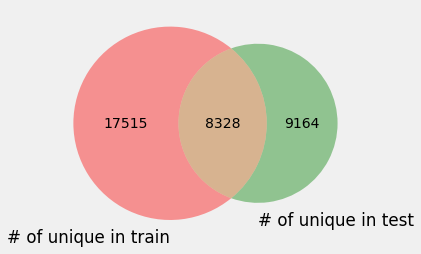

In [41]:
draw_venn('Организатор')

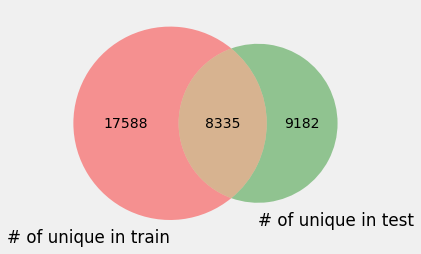

In [42]:
draw_venn('IDOrganizator')

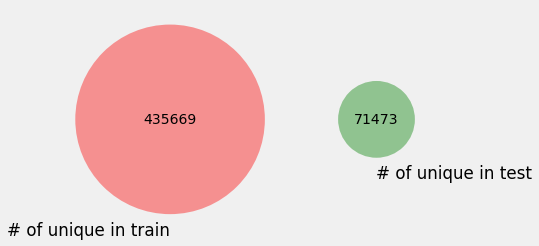

In [48]:
draw_venn('ID')

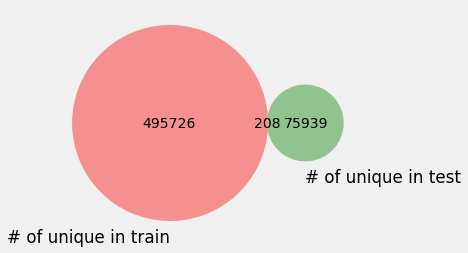

In [49]:
draw_venn('IDLOT')

In [76]:
categorical_dist('РегионОрганизатора')

test     train
Івано-Франківська  0.012466  0.015485
Волинська          0.013769  0.021685
Вінницька          0.066080  0.048786
Дніпропетровська   0.141860  0.137901
Донецька           0.072688  0.084569
Житомирська        0.038621  0.030893
Запорізька         0.051310  0.051239
Київська           0.306270  0.267210
Луганська          0.014927 NaN      
Львівська          0.047427  0.048613
Миколаївська       0.023786  0.029174
Одеська            0.035449  0.036723
Полтавська         0.013453  0.019320
Рівненська         0.013900  0.016175
Сумська            0.016809  0.025743
Тернопільська      0.009517  0.012834
Харківська         0.031131  0.034109
Херсонська        NaN        0.013569
Хмельницька        0.013190  0.016863
Черкаська          0.012979  0.015050
Чернігівська       0.036331  0.034428

## Y distribution

In [45]:
y = train.groupby('unique_id').count().iloc[:,0]

In [46]:
pd.Series(y).describe()

count    500037.000000
mean     1.892168     
std      1.359588     
min      1.000000     
25%      1.000000     
50%      1.000000     
75%      2.000000     
max      24.000000    
Name: Минимальная глубина CPV (2017 год), dtype: float64

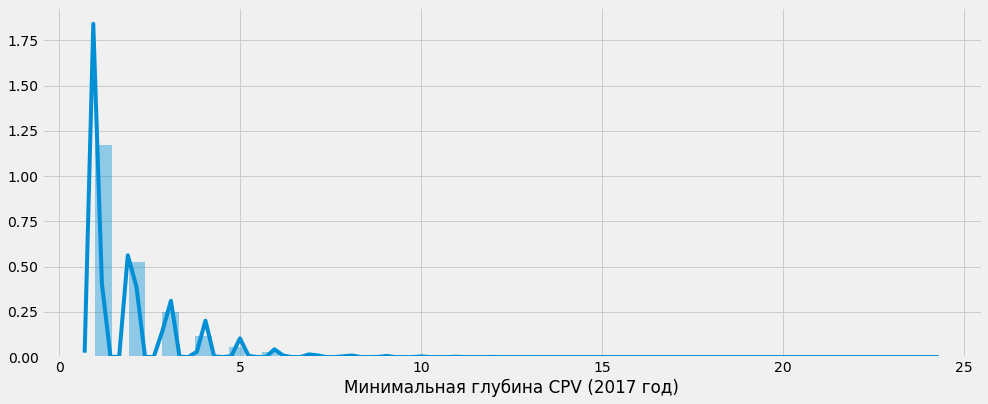

In [43]:
plt.figure(figsize=(15,6))
sns.distplot(train.groupby('unique_id').count().iloc[:,0])

In [59]:
train['Статус лота'].value_counts()

Завершено лот закупівлі     663499
Неуспішний лот закупівлі    200106
Скасовано лот закупівлі     62303 
Активний лот закупівлі      20246 
Name: Статус лота, dtype: int64

In [64]:
train['СтатусТендера'].value_counts()

complete                                681916
unsuccessful                            182641
cancelled                               60705 
active.awarded                          17829 
active.qualification                    2938  
active.pre-qualification                58    
active.tendering                        53    
active.pre-qualification.stand-still    14    
Name: СтатусТендера, dtype: int64

In [74]:
test['Статус лота'].value_counts()

Завершено лот закупівлі    75969
Name: Статус лота, dtype: int64

In [63]:
test['СтатусТендера'].value_counts()

complete    75969
Name: СтатусТендера, dtype: int64

In [72]:
np.mean(train[train['Статус лота'] == 'Завершено лот закупівлі'][train['СтатусТендера'] == 'complete'].groupby('unique_id').count().iloc[:,0])

/home/jt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2.312777481332678